In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt



# Data preparation

In [2]:
spy = pd.read_csv('spy_data.csv', parse_dates=['Date'], skiprows=2)

# Set 'Date' as the index
spy.set_index('Date', inplace=True)

# Verify the result
print(spy.head())


            Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
Date                                                                     
2010-03-16   88.661835  116.410004  116.519997  115.489998  115.809998   
2010-03-17   89.187355  117.099998  117.480003  116.419998  116.760002   
2010-03-18   89.141678  117.040001  117.269997  116.570000  117.110001   
2010-03-19   88.690422  115.970001  117.290001  115.519997  115.970001   
2010-03-22   89.164597  116.589996  116.800003  115.239998  115.309998   

            Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  \
Date                                                                      
2010-03-16   168673000  112.765000    111.5888   75.054675   116.879445   
2010-03-17   177468100  113.107000    111.6642   77.195284   117.461795   
2010-03-18   196509100  113.413499    111.7324   76.579915   117.965072   
2010-03-19   226641100  113.655000    111.7776   66.412120   118.210974   
2010-03-22   184477800  113.926

In [3]:
spy.columns = [
    "Adj Close", "Close", "High", "Low", "Open", "Volume",
    "SMA_20", "SMA_50", "RSI_14", "BB_High", "BB_Low",
    "Return_1D", "Return_5D", "Return_10D"
]

# Verify the updated dataset
print(spy.head())

            Adj Close       Close        High         Low        Open  \
Date                                                                    
2010-03-16  88.661835  116.410004  116.519997  115.489998  115.809998   
2010-03-17  89.187355  117.099998  117.480003  116.419998  116.760002   
2010-03-18  89.141678  117.040001  117.269997  116.570000  117.110001   
2010-03-19  88.690422  115.970001  117.290001  115.519997  115.970001   
2010-03-22  89.164597  116.589996  116.800003  115.239998  115.309998   

               Volume      SMA_20    SMA_50     RSI_14     BB_High  \
Date                                                                 
2010-03-16  168673000  112.765000  111.5888  75.054675  116.879445   
2010-03-17  177468100  113.107000  111.6642  77.195284  117.461795   
2010-03-18  196509100  113.413499  111.7324  76.579915  117.965072   
2010-03-19  226641100  113.655000  111.7776  66.412120  118.210974   
2010-03-22  184477800  113.926499  111.8256  68.982012  118.502512  

In [4]:
# Check sentiment data columns
sentiment_raw = pd.read_csv('sentiment_data_with_historical_dates.csv')
print("Sentiment Columns:", sentiment_raw.columns)
print(sentiment_raw.head())

Sentiment Columns: Index(['neg', 'neu', 'pos', 'compound', 'headline', 'date'], dtype='object')
     neg    neu    pos  compound  \
0  0.259  0.506  0.234   -0.1027   
1  0.238  0.762  0.000   -0.3612   
2  0.000  1.000  0.000    0.0000   
3  0.000  1.000  0.000    0.0000   
4  0.000  0.853  0.147    0.4767   

                                            headline        date  
0  South Korean Stocks Slide, Won Dips as Politic...  2010-03-16  
1  Asia stocks slugged by South Korea turmoil, Ch...  2010-03-16  
2  Five Key Charts to Watch in Global Commodity M...  2010-03-16  
3  ‘The mother of all bubbles’ in the US is sucki...  2010-03-16  
4  Sports, pop culture, and the weather: What's n...  2010-03-16  


In [5]:
sentiment_data = pd.read_csv('sentiment_data_with_historical_dates.csv', parse_dates=['date'])

In [6]:
# Check date ranges
spy_date_range = (spy.index.min(), spy.index.max())
sentiment_date_range = (sentiment_data['date'].min(), sentiment_data['date'].max())

print("SPY date range:", spy_date_range)
print("Sentiment date range:", sentiment_date_range)

SPY date range: (Timestamp('2010-03-16 00:00:00'), Timestamp('2022-12-30 00:00:00'))
Sentiment date range: (Timestamp('2010-03-16 00:00:00'), Timestamp('2022-12-30 00:00:00'))


In [7]:
print(type(spy))
print(type(sentiment_data))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [8]:
# Merge the datasets
merged_data = spy.merge(sentiment_data, left_index=True, right_on='date', how='inner')

# Save the merged dataset
merged_data.to_csv('merged_spy_sentiment.csv', index=False)
print("Merged dataset saved as 'merged_spy_sentiment.csv'.")

# Preview merged data
print(merged_data.head())

Merged dataset saved as 'merged_spy_sentiment.csv'.
   Adj Close       Close        High         Low        Open     Volume  \
0  88.661835  116.410004  116.519997  115.489998  115.809998  168673000   
1  88.661835  116.410004  116.519997  115.489998  115.809998  168673000   
2  88.661835  116.410004  116.519997  115.489998  115.809998  168673000   
3  88.661835  116.410004  116.519997  115.489998  115.809998  168673000   
4  88.661835  116.410004  116.519997  115.489998  115.809998  168673000   

    SMA_20    SMA_50     RSI_14     BB_High      BB_Low  Return_1D  Return_5D  \
0  112.765  111.5888  75.054675  116.879445  108.650555   0.007966   0.017037   
1  112.765  111.5888  75.054675  116.879445  108.650555   0.007966   0.017037   
2  112.765  111.5888  75.054675  116.879445  108.650555   0.007966   0.017037   
3  112.765  111.5888  75.054675  116.879445  108.650555   0.007966   0.017037   
4  112.765  111.5888  75.054675  116.879445  108.650555   0.007966   0.017037   

   Return_

In [9]:
print(merged_data[['Close', 'compound']].describe())
print(merged_data[['Close', 'compound']].isna().sum())
print(merged_data.head())


               Close       compound
count  154704.000000  154704.000000
mean      241.904682       0.056839
std        97.935372       0.311258
min       102.199997      -0.812600
25%       162.880005       0.000000
50%       213.710007       0.000000
75%       294.040009       0.202300
max       477.709991       0.648600
Close       0
compound    0
dtype: int64
   Adj Close       Close        High         Low        Open     Volume  \
0  88.661835  116.410004  116.519997  115.489998  115.809998  168673000   
1  88.661835  116.410004  116.519997  115.489998  115.809998  168673000   
2  88.661835  116.410004  116.519997  115.489998  115.809998  168673000   
3  88.661835  116.410004  116.519997  115.489998  115.809998  168673000   
4  88.661835  116.410004  116.519997  115.489998  115.809998  168673000   

    SMA_20    SMA_50     RSI_14     BB_High      BB_Low  Return_1D  Return_5D  \
0  112.765  111.5888  75.054675  116.879445  108.650555   0.007966   0.017037   
1  112.765  111.5888  

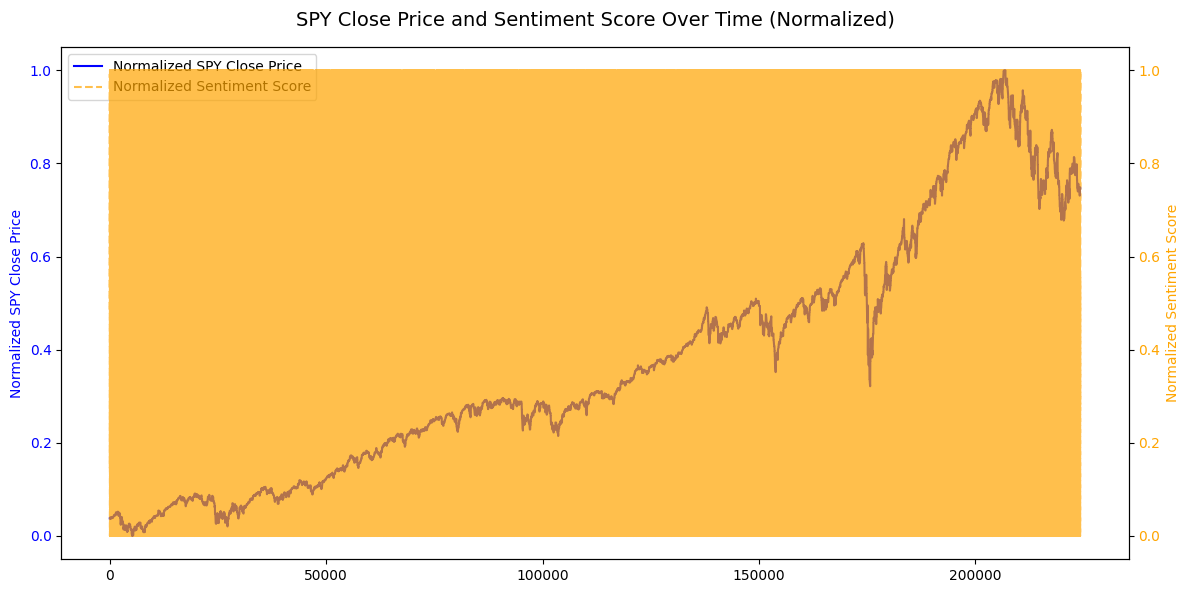

In [10]:
# Plot the data
import matplotlib.pyplot as plt

# Assuming 'Close' is the column you want to normalize:
merged_data['Close_normalized'] = (merged_data['Close'] - merged_data['Close'].min()) / (merged_data['Close'].max() - merged_data['Close'].min())
merged_data['compound_normalized'] = (merged_data['compound'] - merged_data['compound'].min()) / (merged_data['compound'].max() - merged_data['compound'].min())

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Close_normalized on the primary y-axis
ax1.plot(
    merged_data.index,
    merged_data['Close_normalized'],
    color='blue',
    label='Normalized SPY Close Price'
)
ax1.set_ylabel('Normalized SPY Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot compound_normalized on the secondary y-axis with transparency
ax2 = ax1.twinx()
ax2.plot(
    merged_data.index,
    merged_data['compound_normalized'],
    color='orange',
    label='Normalized Sentiment Score',
    linestyle='--',
    alpha=0.7
)
ax2.set_ylabel('Normalized Sentiment Score', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and legend
fig.suptitle('SPY Close Price and Sentiment Score Over Time (Normalized)', fontsize=14)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')
fig.tight_layout()

# Display plot
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
import xgboost as xgb
import lightgbm as lgb
import pandas as pd

# Step 1: Prepare the dataset
# Define features (X) and target (y)
# Example: using key features like SMA, RSI, and sentiment compound score
X = merged_data[['SMA_20', 'RSI_14', 'BB_High', 'BB_Low', 'compound']]
y = (merged_data['Return_1D'] > 0).astype(int)  # Target: Binary (1 if positive return, 0 otherwise)


In [12]:
from sklearn.model_selection import train_test_split

# Split the data into train + validation and test sets (e.g., 70% train, 30% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the training data into actual train and validation sets (e.g., 80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")


Training set size: 86633
Validation set size: 21659
Test set size: 46412


In [13]:
pip show xgboost

Name: xgboost
Version: 1.7.6
Summary: XGBoost Python Package
Home-page: https://github.com/dmlc/xgboost
Author: 
Author-email: 
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, scipy
Required-by: 


In [14]:
import xgboost as xgb

# Ensure X_train, X_val, and X_test have the correct types and no NaNs
print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}, X_test shape: {X_test.shape}")
print(f"y_train unique values: {set(y_train)}, y_val unique values: {set(y_val)}")

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,  # Prevent deprecated label encoder
    verbosity=1  # Print verbose output during training
)

# Fit the model with verbose debugging and ensure no unsupported arguments are passed
try:
    xgb_model.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],  # Add validation set
        early_stopping_rounds=10,  # Early stopping after 10 rounds
        verbose=True  # Show progress
    )
except TypeError as e:
    print(f"TypeError: {e}")
    print("Retrying without early_stopping_rounds to debug...")

    # Retry without early stopping for debugging
    xgb_model.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],  # Add validation set
        verbose=True  # Show progress
    )

# Make predictions
y_pred = xgb_model.predict(X_test)


X_train shape: (86633, 5), X_val shape: (21659, 5), X_test shape: (46412, 5)
y_train unique values: {0, 1}, y_val unique values: {0, 1}
[0]	validation_0-logloss:0.65646
[1]	validation_0-logloss:0.63306


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-logloss:0.61759
[3]	validation_0-logloss:0.60542
[4]	validation_0-logloss:0.59651
[5]	validation_0-logloss:0.58437
[6]	validation_0-logloss:0.57462
[7]	validation_0-logloss:0.56783
[8]	validation_0-logloss:0.55950
[9]	validation_0-logloss:0.55547
[10]	validation_0-logloss:0.55253
[11]	validation_0-logloss:0.54374
[12]	validation_0-logloss:0.53792
[13]	validation_0-logloss:0.53598
[14]	validation_0-logloss:0.53244
[15]	validation_0-logloss:0.52623
[16]	validation_0-logloss:0.52251
[17]	validation_0-logloss:0.51884
[18]	validation_0-logloss:0.51609
[19]	validation_0-logloss:0.51458
[20]	validation_0-logloss:0.50977
[21]	validation_0-logloss:0.50631
[22]	validation_0-logloss:0.50306
[23]	validation_0-logloss:0.50146
[24]	validation_0-logloss:0.49891
[25]	validation_0-logloss:0.49354
[26]	validation_0-logloss:0.48795
[27]	validation_0-logloss:0.47927
[28]	validation_0-logloss:0.47303
[29]	validation_0-logloss:0.46941
[30]	validation_0-logloss:0.46617
[31]	validation_0-logl

In [15]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Evaluate performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93     21343
           1       0.92      0.97      0.94     25069

    accuracy                           0.93     46412
   macro avg       0.94      0.93      0.93     46412
weighted avg       0.94      0.93      0.93     46412

Accuracy Score: 0.9340041368611566


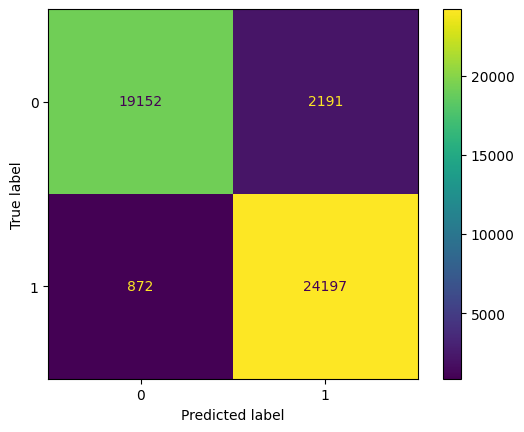

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test)


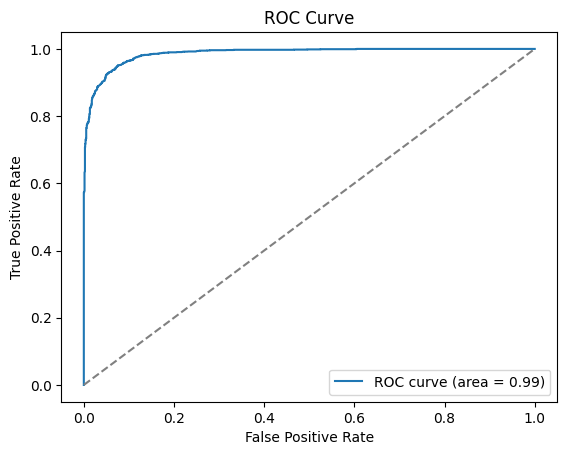

In [17]:
from sklearn.metrics import roc_curve, auc

y_proba = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


**Truly excellent performance**

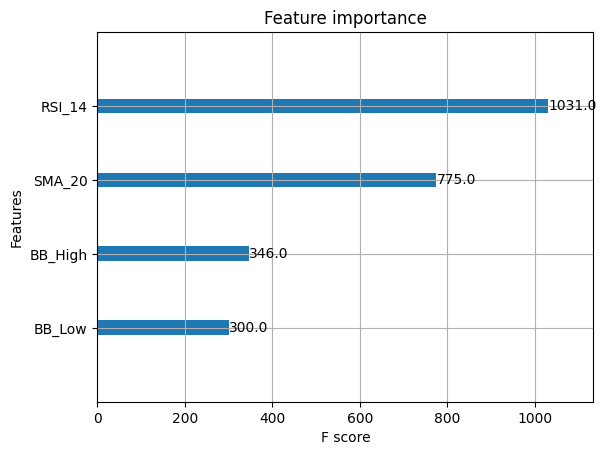

In [18]:
xgb.plot_importance(xgb_model)
plt.show()

In [19]:
import joblib

# Save the untuned model
joblib.dump(xgb_model, 'xgb_model_untuned.pkl')
print("Untuned model saved as 'xgb_model_untuned.pkl'")

Untuned model saved as 'xgb_model_untuned.pkl'


**Hypertuning parameters using random search. Also now using early stopping!**

In [20]:
pip install xgboost==1.7.6

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
import xgboost as xgb

# Define parameter grid for random search
param_distributions = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
}

# Define model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False)

# Define scoring
scorer = make_scorer(f1_score, average='weighted')

# Custom wrapper to include early stopping
def custom_fit_with_early_stopping(estimator, X, y):
    estimator.fit(
        X, y,
        eval_set=[(X_val, y_val)],  # Validation set
        early_stopping_rounds=10,
        verbose=False
    )
    return estimator

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=50,
    scoring=scorer,
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1,
    error_score='raise',  # Raise errors for debugging
)

# Perform random search
random_search.fit(X_train, y_train)

# Retrieve the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Train the final model with best parameters and early stopping
final_model = xgb.XGBClassifier(**best_params, random_state=42, use_label_encoder=False)
final_model.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=10,
    verbose=True
)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 1.0}
[0]	validation_0-logloss:0.64996
[1]	validation_0-logloss:0.61664


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-logloss:0.59607
[3]	validation_0-logloss:0.57309
[4]	validation_0-logloss:0.55005
[5]	validation_0-logloss:0.53920
[6]	validation_0-logloss:0.52824
[7]	validation_0-logloss:0.51390
[8]	validation_0-logloss:0.50076
[9]	validation_0-logloss:0.49417
[10]	validation_0-logloss:0.48903
[11]	validation_0-logloss:0.48420
[12]	validation_0-logloss:0.47467
[13]	validation_0-logloss:0.46810
[14]	validation_0-logloss:0.46525
[15]	validation_0-logloss:0.46171
[16]	validation_0-logloss:0.45494
[17]	validation_0-logloss:0.44779
[18]	validation_0-logloss:0.44179
[19]	validation_0-logloss:0.44002
[20]	validation_0-logloss:0.43895
[21]	validation_0-logloss:0.43380
[22]	validation_0-logloss:0.42846
[23]	validation_0-logloss:0.41912
[24]	validation_0-logloss:0.41668
[25]	validation_0-logloss:0.41284
[26]	validation_0-logloss:0.41173
[27]	validation_0-logloss:0.41094
[28]	validation_0-logloss:0.40409
[29]	validation_0-logloss:0.40232
[30]	validation_0-logloss:0.40058
[31]	validation_0-logl

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Predict on the test set
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]  # For ROC and AUC

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21343
           1       1.00      1.00      1.00     25069

    accuracy                           1.00     46412
   macro avg       1.00      1.00      1.00     46412
weighted avg       1.00      1.00      1.00     46412



Confusion Matrix:


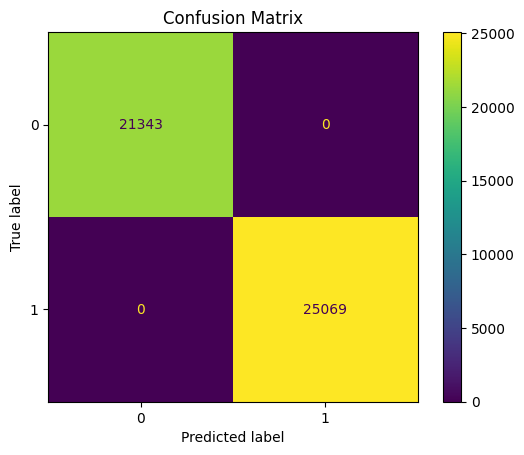

In [23]:
# Confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot(cmap="viridis")
plt.title("Confusion Matrix")
plt.show()


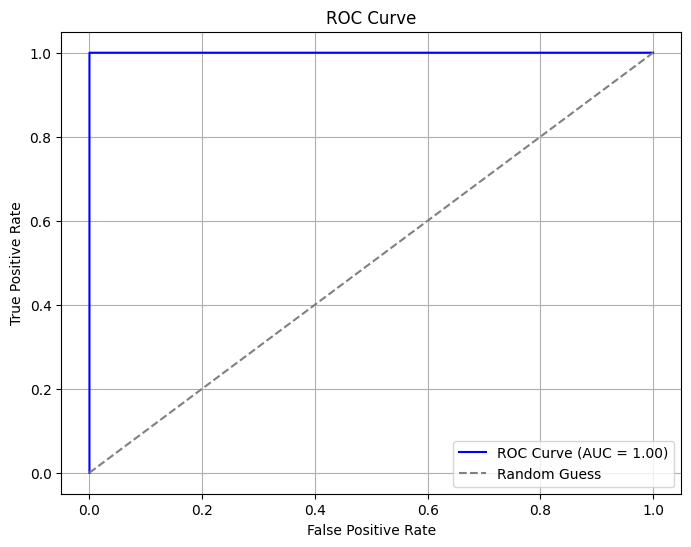

In [24]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

**Well, this is very overfit.**

In [25]:
# Save the tuned model
joblib.dump(final_model, 'xgb_model_tuned.pkl')
print("Tuned model saved as 'xgb_model_tuned.pkl'")


Tuned model saved as 'xgb_model_tuned.pkl'


In [26]:
pip install lightgbm==3.3.5 --upgrade


In [27]:
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the model with early stopping
lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=10,
    verbose=True
)

# Evaluate on the test set
y_pred = lgb_model.predict(X_test)

# Print classification report
print("Classification Report for Untuned LightGBM:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.675312
[2]	valid_0's binary_logloss: 0.664975
[3]	valid_0's binary_logloss: 0.655778
[4]	valid_0's binary_logloss: 0.648213
[5]	valid_0's binary_logloss: 0.640623
[6]	valid_0's binary_logloss: 0.634088
[7]	valid_0's binary_logloss: 0.628143
[8]	valid_0's binary_logloss: 0.623496
[9]	valid_0's binary_logloss: 0.61915
[10]	valid_0's binary_logloss: 0.614552
[11]	valid_0's binary_logloss: 0.610448
[12]	valid_0's binary_logloss: 0.607174
[13]	valid_0's binary_logloss: 0.603945
[14]	valid_0's binary_logloss: 0.600632
[15]	valid_0's binary_logloss: 0.597028
[16]	valid_0's binary_logloss: 0.594219
[17]	valid_0's binary_logloss: 0.59141
[18]	valid_0's binary_logloss: 0.588851
[19]	valid_0's binary_logloss: 0.586451
[20]	valid_0's binary_logloss: 0.583439
[21]	valid_0's binary_logloss: 0.580989
[22]	valid_0's binary_logloss: 0.578372
[23]	valid_0's binary_logloss: 0.576127
[24]	valid_0's binary_logloss: 0.574155
[25]	valid_0's binary_logloss: 0.571722
[26]	valid_

Confusion Matrix for Untuned LightGBM:


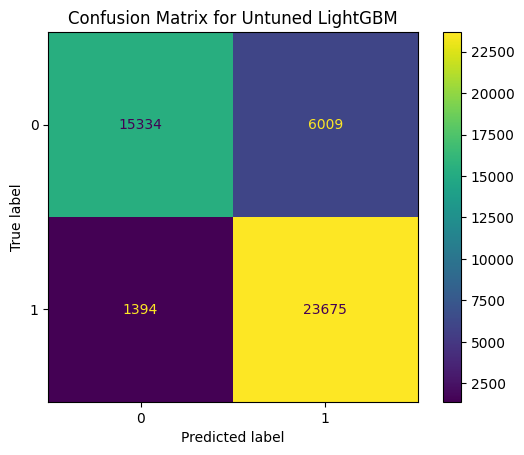

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix for Untuned LightGBM
print("Confusion Matrix for Untuned LightGBM:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgb_model.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix for Untuned LightGBM")
plt.show()



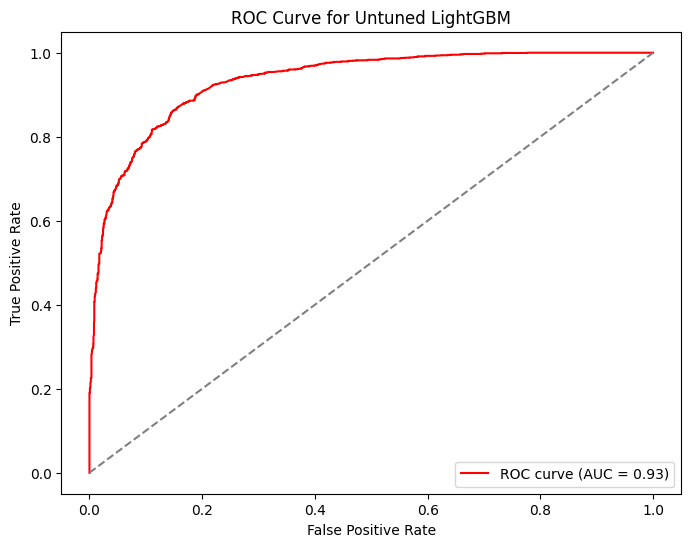

In [29]:
# ROC Curve for Untuned LightGBM
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Untuned LightGBM')
plt.legend(loc='lower right')
plt.show()


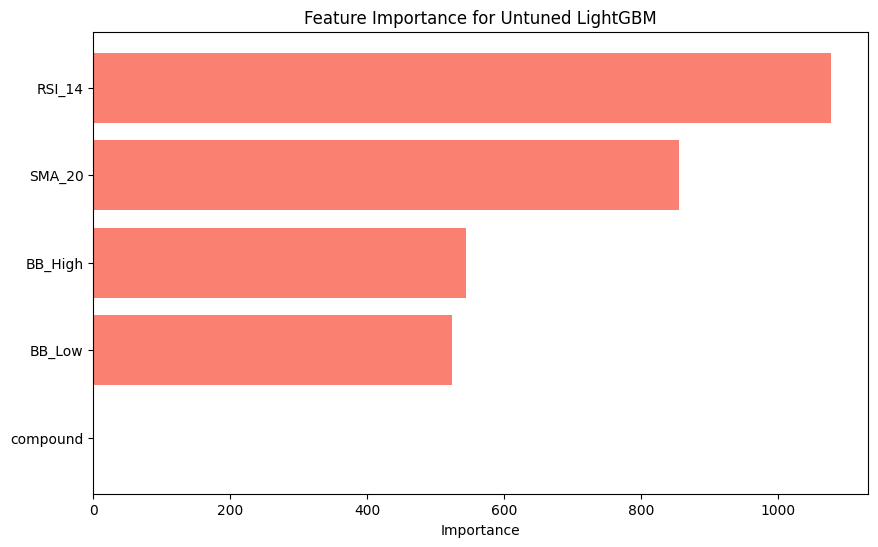

In [30]:
# Feature importance for untuned LightGBM
untuned_feature_importance = lgb_model.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_idx = untuned_feature_importance.argsort()
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], untuned_feature_importance[sorted_idx], color='salmon')
plt.xlabel('Importance')
plt.title('Feature Importance for Untuned LightGBM')
plt.show()


In [31]:
import joblib

# Save the untuned LightGBM model
joblib.dump(lgb_model, 'lgb_model_untuned.pkl')
print("Untuned LightGBM model saved as 'lgb_model_untuned.pkl'")

Untuned LightGBM model saved as 'lgb_model_untuned.pkl'


In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define parameter grid for LightGBM
param_distributions = {
    'num_leaves': [15, 31, 63, 127],
    'max_depth': [-1, 5, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300],
    'min_child_samples': [10, 20, 30, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Define scoring
scorer = make_scorer(f1_score, average='weighted')


In [33]:
# Define LightGBM model
lgb_model_tuned = lgb.LGBMClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgb_model_tuned,
    param_distributions=param_distributions,
    n_iter=50,
    scoring=scorer,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Perform random search
random_search.fit(X_train, y_train)

# Retrieve the best parameters
best_params = random_search.best_params_
print("Best Parameters for LightGBM:", best_params)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters for LightGBM: {'subsample': 0.8, 'num_leaves': 127, 'n_estimators': 300, 'min_child_samples': 10, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.6}


In [34]:
# Train the final model with the best parameters
final_lgb_model = lgb.LGBMClassifier(**best_params, random_state=42)
final_lgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=True)

# Evaluate the final model
y_pred_tuned = final_lgb_model.predict(X_test)

# Print classification report
print("Classification Report for Tuned LightGBM:")
print(classification_report(y_test, y_pred_tuned))


[1]	valid_0's binary_logloss: 0.670852
[2]	valid_0's binary_logloss: 0.657074
[3]	valid_0's binary_logloss: 0.621884
[4]	valid_0's binary_logloss: 0.616021
[5]	valid_0's binary_logloss: 0.588382
[6]	valid_0's binary_logloss: 0.562518
[7]	valid_0's binary_logloss: 0.541279


/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[8]	valid_0's binary_logloss: 0.526622
[9]	valid_0's binary_logloss: 0.511929
[10]	valid_0's binary_logloss: 0.509995
[11]	valid_0's binary_logloss: 0.497046
[12]	valid_0's binary_logloss: 0.491353
[13]	valid_0's binary_logloss: 0.477136
[14]	valid_0's binary_logloss: 0.468803
[15]	valid_0's binary_logloss: 0.45541
[16]	valid_0's binary_logloss: 0.444676
[17]	valid_0's binary_logloss: 0.438445
[18]	valid_0's binary_logloss: 0.435122
[19]	valid_0's binary_logloss: 0.425859
[20]	valid_0's binary_logloss: 0.424839
[21]	valid_0's binary_logloss: 0.415213
[22]	valid_0's binary_logloss: 0.406222
[23]	valid_0's binary_logloss: 0.397106
[24]	valid_0's binary_logloss: 0.394054
[25]	valid_0's binary_logloss: 0.382403
[26]	valid_0's binary_logloss: 0.381751
[27]	valid_0's binary_logloss: 0.374002
[28]	valid_0's binary_logloss: 0.365725
[29]	valid_0's binary_logloss: 0.355545
[30]	valid_0's binary_logloss: 0.352036
[31]	valid_0's binary_logloss: 0.343618
[32]	valid_0's binary_logloss: 0.340144
[33

Confusion Matrix:


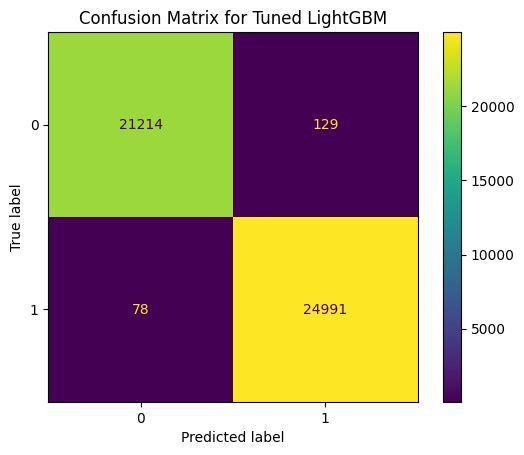

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_lgb_model.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix for Tuned LightGBM")
plt.show()




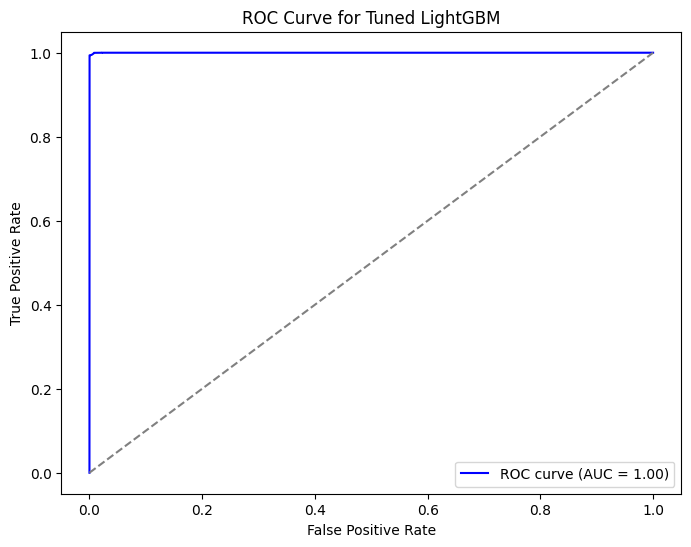

In [36]:
# ROC Curve
y_pred_proba_tuned = final_lgb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_tuned)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned LightGBM')
plt.legend(loc='lower right')
plt.show()

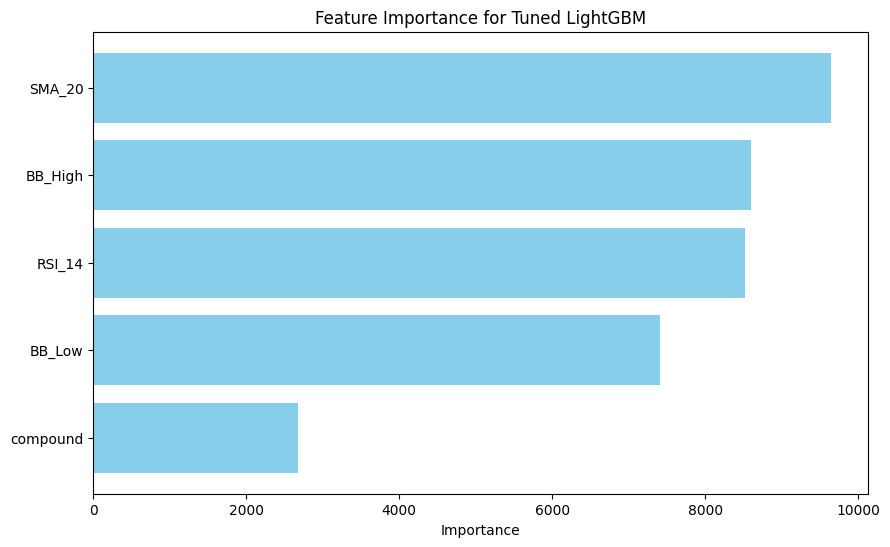

In [37]:
# Feature importance
feature_importance = final_lgb_model.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_idx = feature_importance.argsort()
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], feature_importance[sorted_idx], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Tuned LightGBM')
plt.show()


In [38]:
# Save the tuned LightGBM model
joblib.dump(final_lgb_model, 'lgb_model_tuned.pkl')
print("Tuned LightGBM model saved as 'lgb_model_tuned.pkl'")


Tuned LightGBM model saved as 'lgb_model_tuned.pkl'



# Step 2: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: XGBoost Model
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
print("XGBoost Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")
print(f"AUC: {roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]):.4f}")
print(classification_report(y_test, y_pred_xgb))

# Step 4: LightGBM Model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate LightGBM
print("\nLightGBM Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lgb):.4f}")
print(f"AUC: {roc_auc_score(y_test, lgb_model.predict_proba(X_test)[:, 1]):.4f}")
print(classification_report(y_test, y_pred_lgb))

# Optional: Feature Importance Visualization
import matplotlib.pyplot as plt

xgb_importances = xgb_model.feature_importances_
lgb_importances = lgb_model.feature_importances_

plt.figure(figsize=(12, 6))
plt.barh(X.columns, xgb_importances, color='blue', alpha=0.7, label='XGBoost')
plt.barh(X.columns, lgb_importances, color='green', alpha=0.5, label='LightGBM')
plt.title("Feature Importances")
plt.legend()
plt.show()
